In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_excel('cleaned_data.xlsx')
X = df[['Price (INR)']]
y = df['Number Booked']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

R-squared: 0.04
Mean Squared Error: 98.71


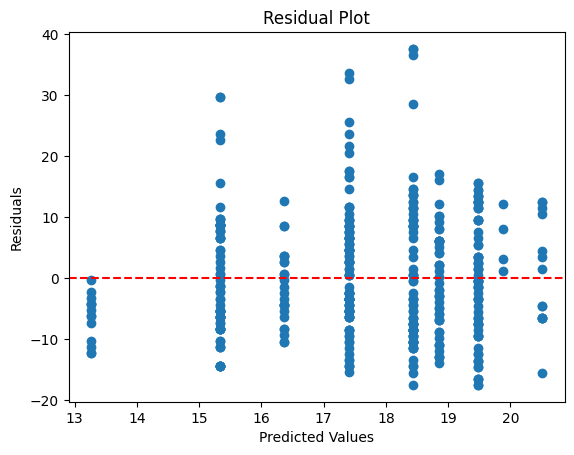

In [ ]:

from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared:.2f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:

df['day_of_week'] = pd.to_datetime(df['BookingEndDateTime (Month / Day / Year)']).dt.day_name()


X = pd.get_dummies(df[['Price (INR)', 'day_of_week']], columns=['day_of_week'], drop_first=True)
y = df['Number Booked']

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

New R-squared: 0.09
New Mean Squared Error: 94.00


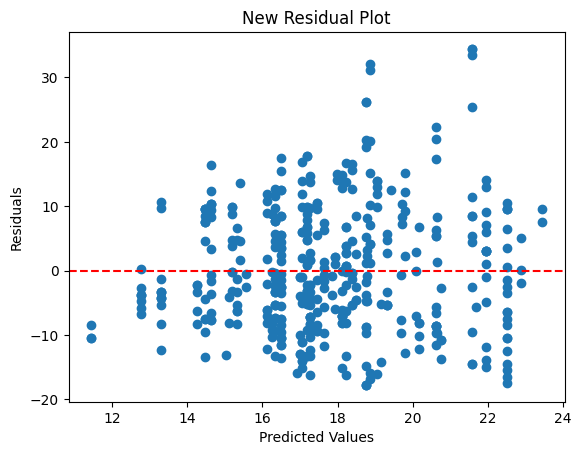

In [ ]:

from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


r_squared_new = r2_score(y_test, y_pred)
mse_new = mean_squared_error(y_test, y_pred)

print(f"New R-squared: {r_squared_new:.2f}")
print(f"New Mean Squared Error: {mse_new:.2f}")


residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("New Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:

df['day_of_week'] = pd.to_datetime(df['BookingEndDateTime (Month / Day / Year)']).dt.day_name()


df['BookingStartTime'] = pd.to_datetime(df['BookingStartTime'])

def categorize_time(time):
    if 5 <= time.hour < 12:
        return 'Morning'
    elif 12 <= time.hour < 17:
        return 'Afternoon'
    else:
        return 'Evening'

df['time_of_day'] = df['BookingStartTime'].apply(categorize_time)

features = ['Price (INR)', 'day_of_week', 'time_of_day', 'ActivityDescription']
X = pd.get_dummies(df[features], columns=['day_of_week', 'time_of_day', 'ActivityDescription'], drop_first=True)
y = df['Number Booked']



In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

In [ ]:

r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"New R-squared: {r_squared:.2f}")
print(f"New Mean Squared Error: {mse:.2f}")

New R-squared: 0.81
New Mean Squared Error: 19.15
